# NAME : PRIYANSHU PULAK
# Reg No. : 22BIT0587

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing DataSet

In [2]:
ls

Task 2 - Classification.pdf  breast_cancer.csv
Task 2 .ipynb


In [3]:
dataset = pd.read_csv('breast_cancer.csv')
df = dataset.copy()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Data Preprocessing

### Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Checking for Null Value

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

### Checking for Unique

In [6]:
df.shape

(569, 31)

In [7]:
for column, data in df.items():
    unique_no = df[column].nunique() 
    print(f'{column} : {unique_no}')  

mean radius : 456
mean texture : 479
mean perimeter : 522
mean area : 539
mean smoothness : 474
mean compactness : 537
mean concavity : 537
mean concave points : 542
mean symmetry : 432
mean fractal dimension : 499
radius error : 540
texture error : 519
perimeter error : 533
area error : 528
smoothness error : 547
compactness error : 541
concavity error : 533
concave points error : 507
symmetry error : 498
fractal dimension error : 545
worst radius : 457
worst texture : 511
worst perimeter : 514
worst area : 544
worst smoothness : 411
worst compactness : 529
worst concavity : 539
worst concave points : 492
worst symmetry : 500
worst fractal dimension : 535
outcome : 2


### Coreraltion of every features with outcome

In [8]:
df_correlation = df.corr()
df_correlation['outcome'].sort_values(ascending = False)

outcome                    1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
symmetry error            -0

### Co-relation b/w every columns(HeatMap)

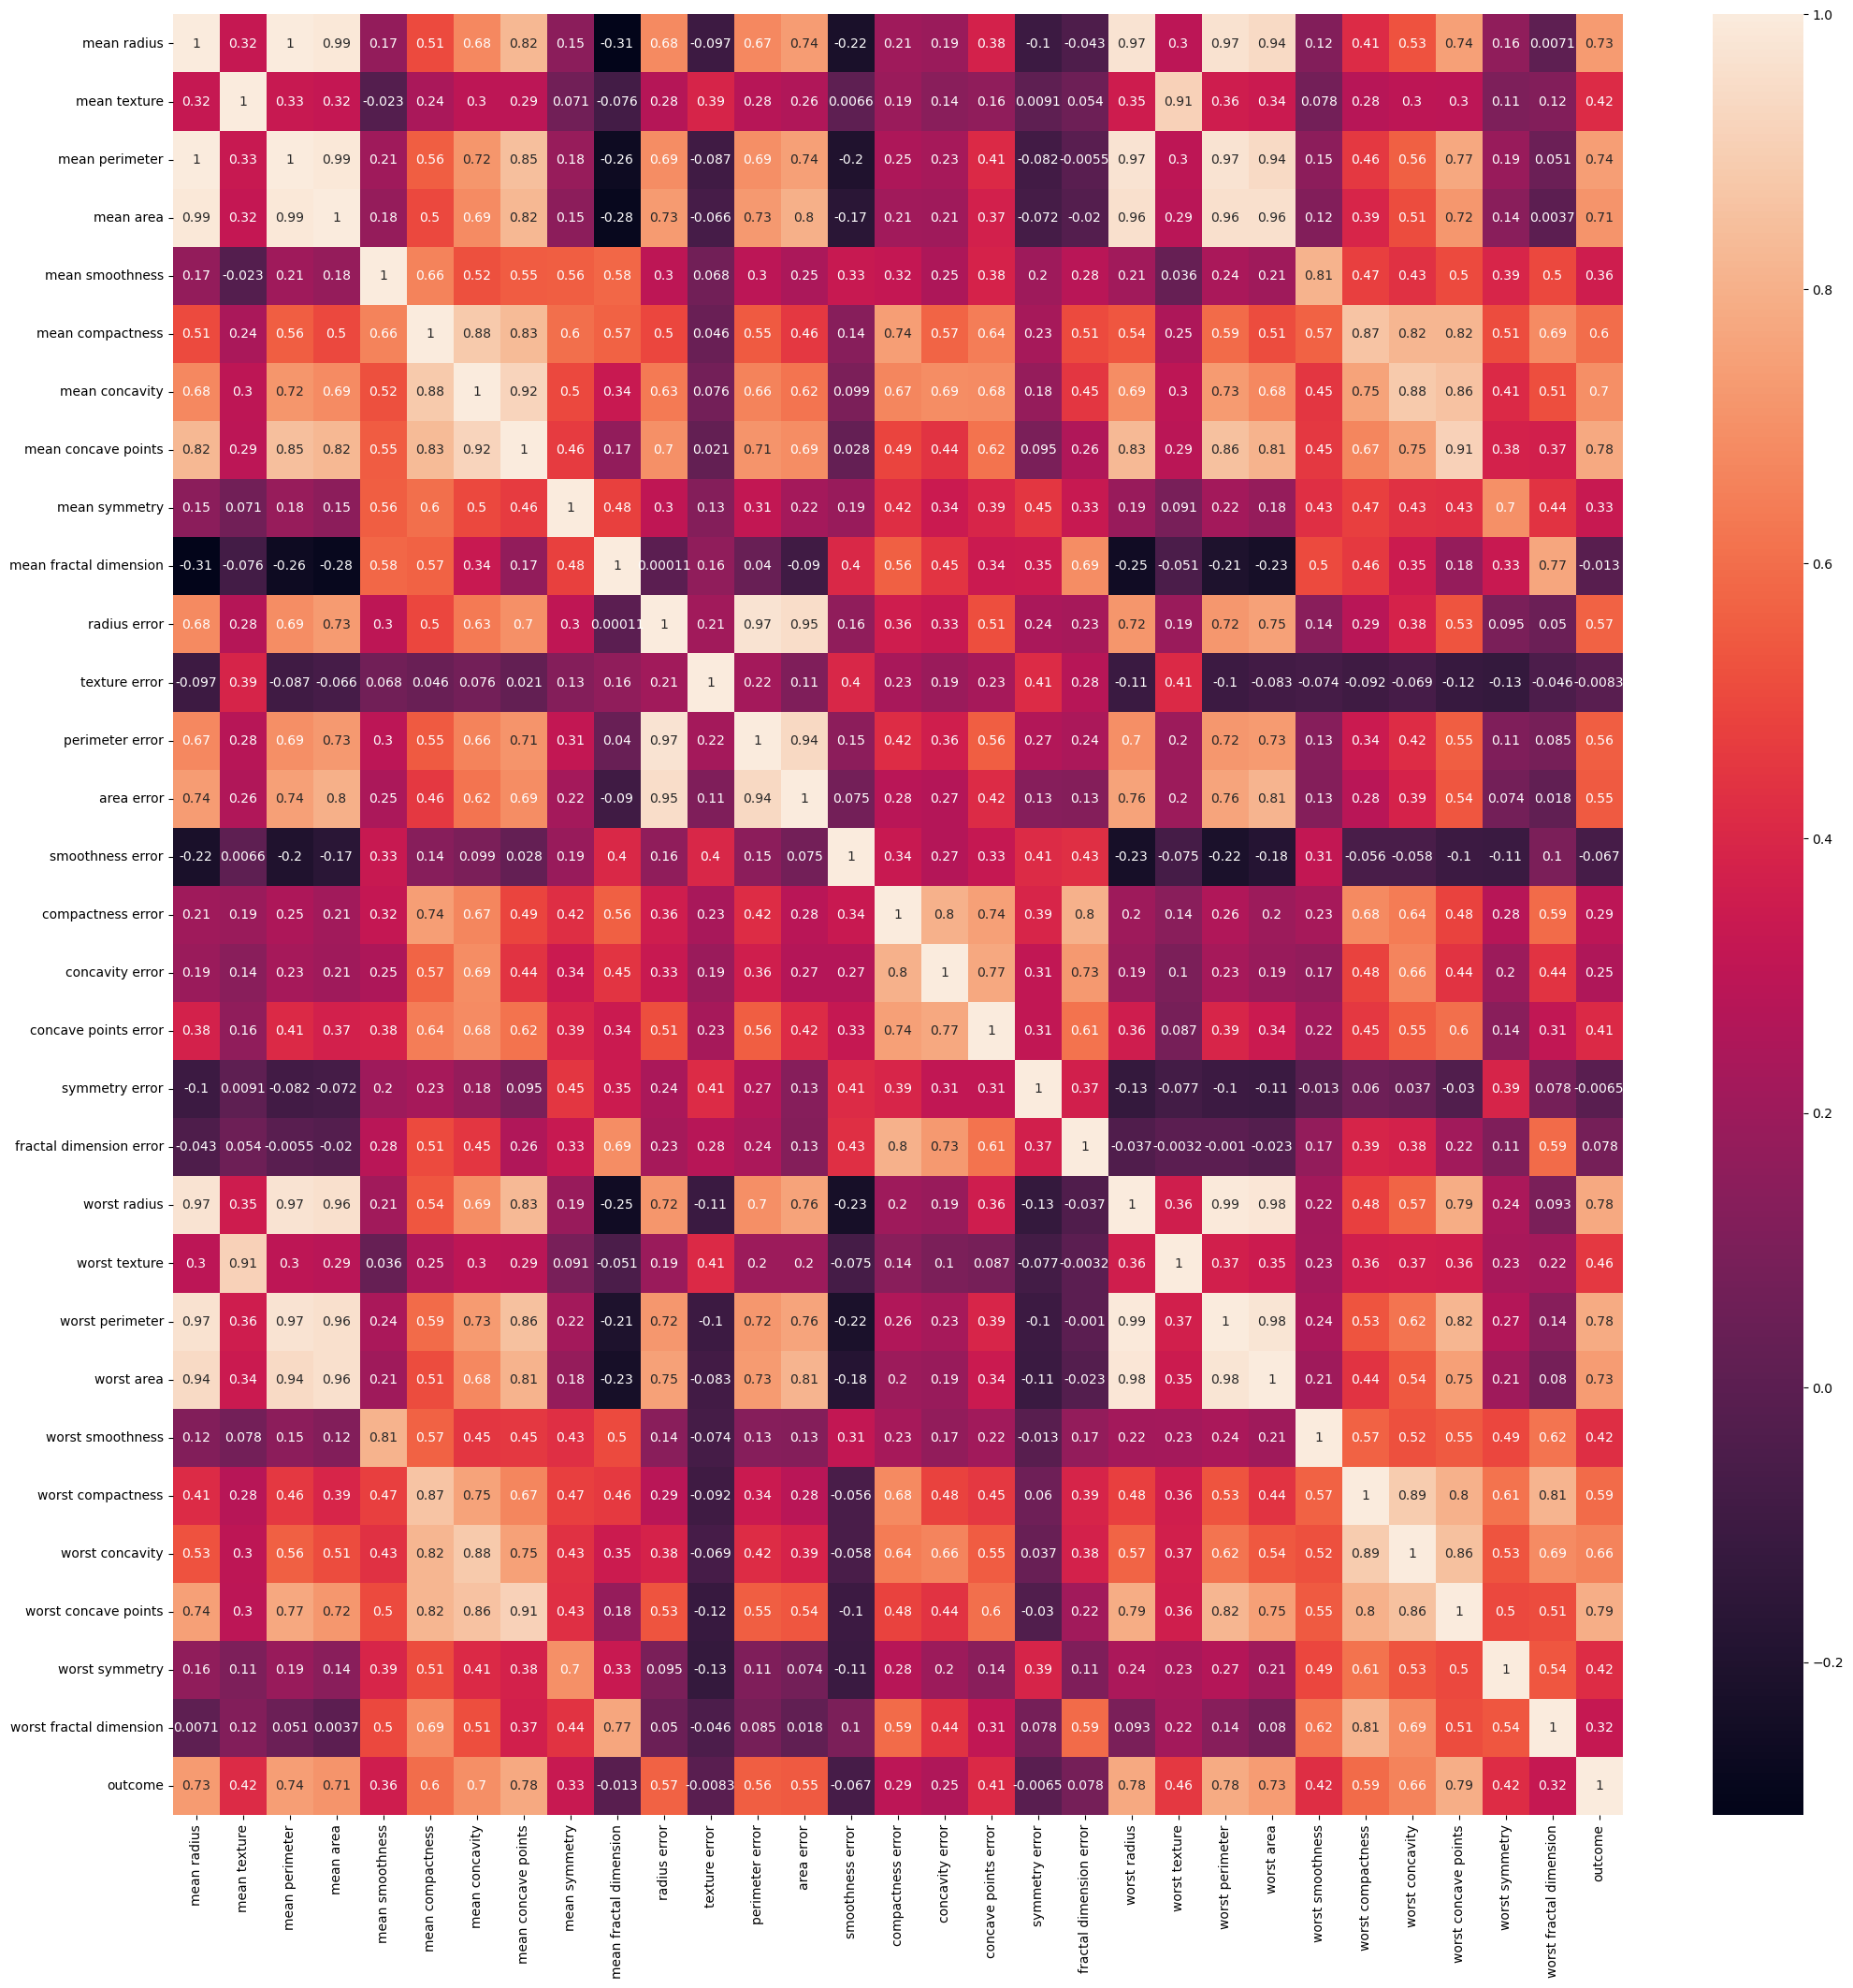

In [9]:
plt.figure(figsize = (25, 25), dpi = 100)
sns.heatmap(df_correlation, annot = True)
plt.show()

## Visualising

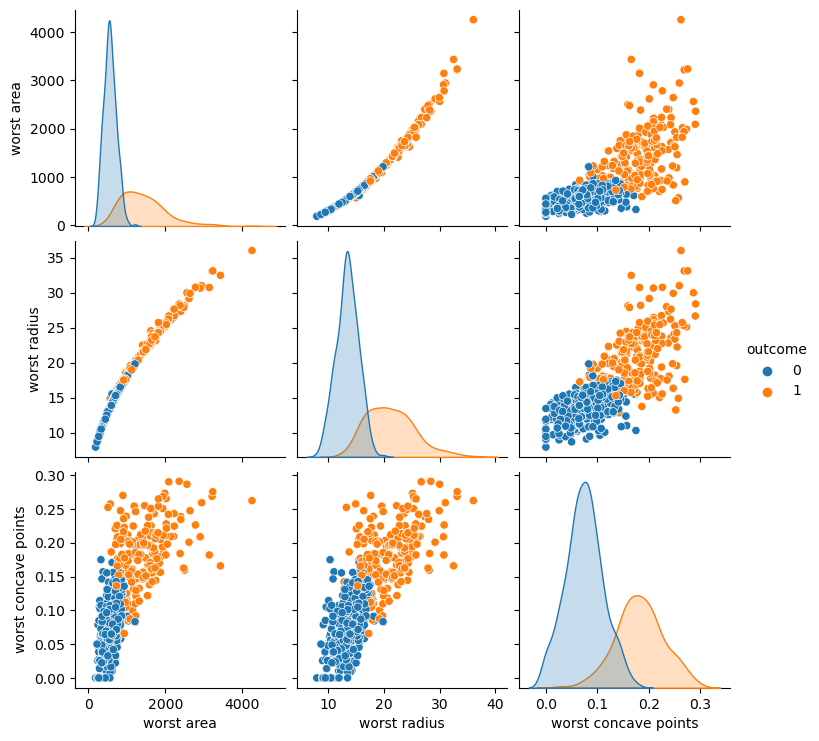

In [10]:
sns.pairplot(df[['worst area', 'worst radius', 'outcome', 'worst concave points']], hue = 'outcome')

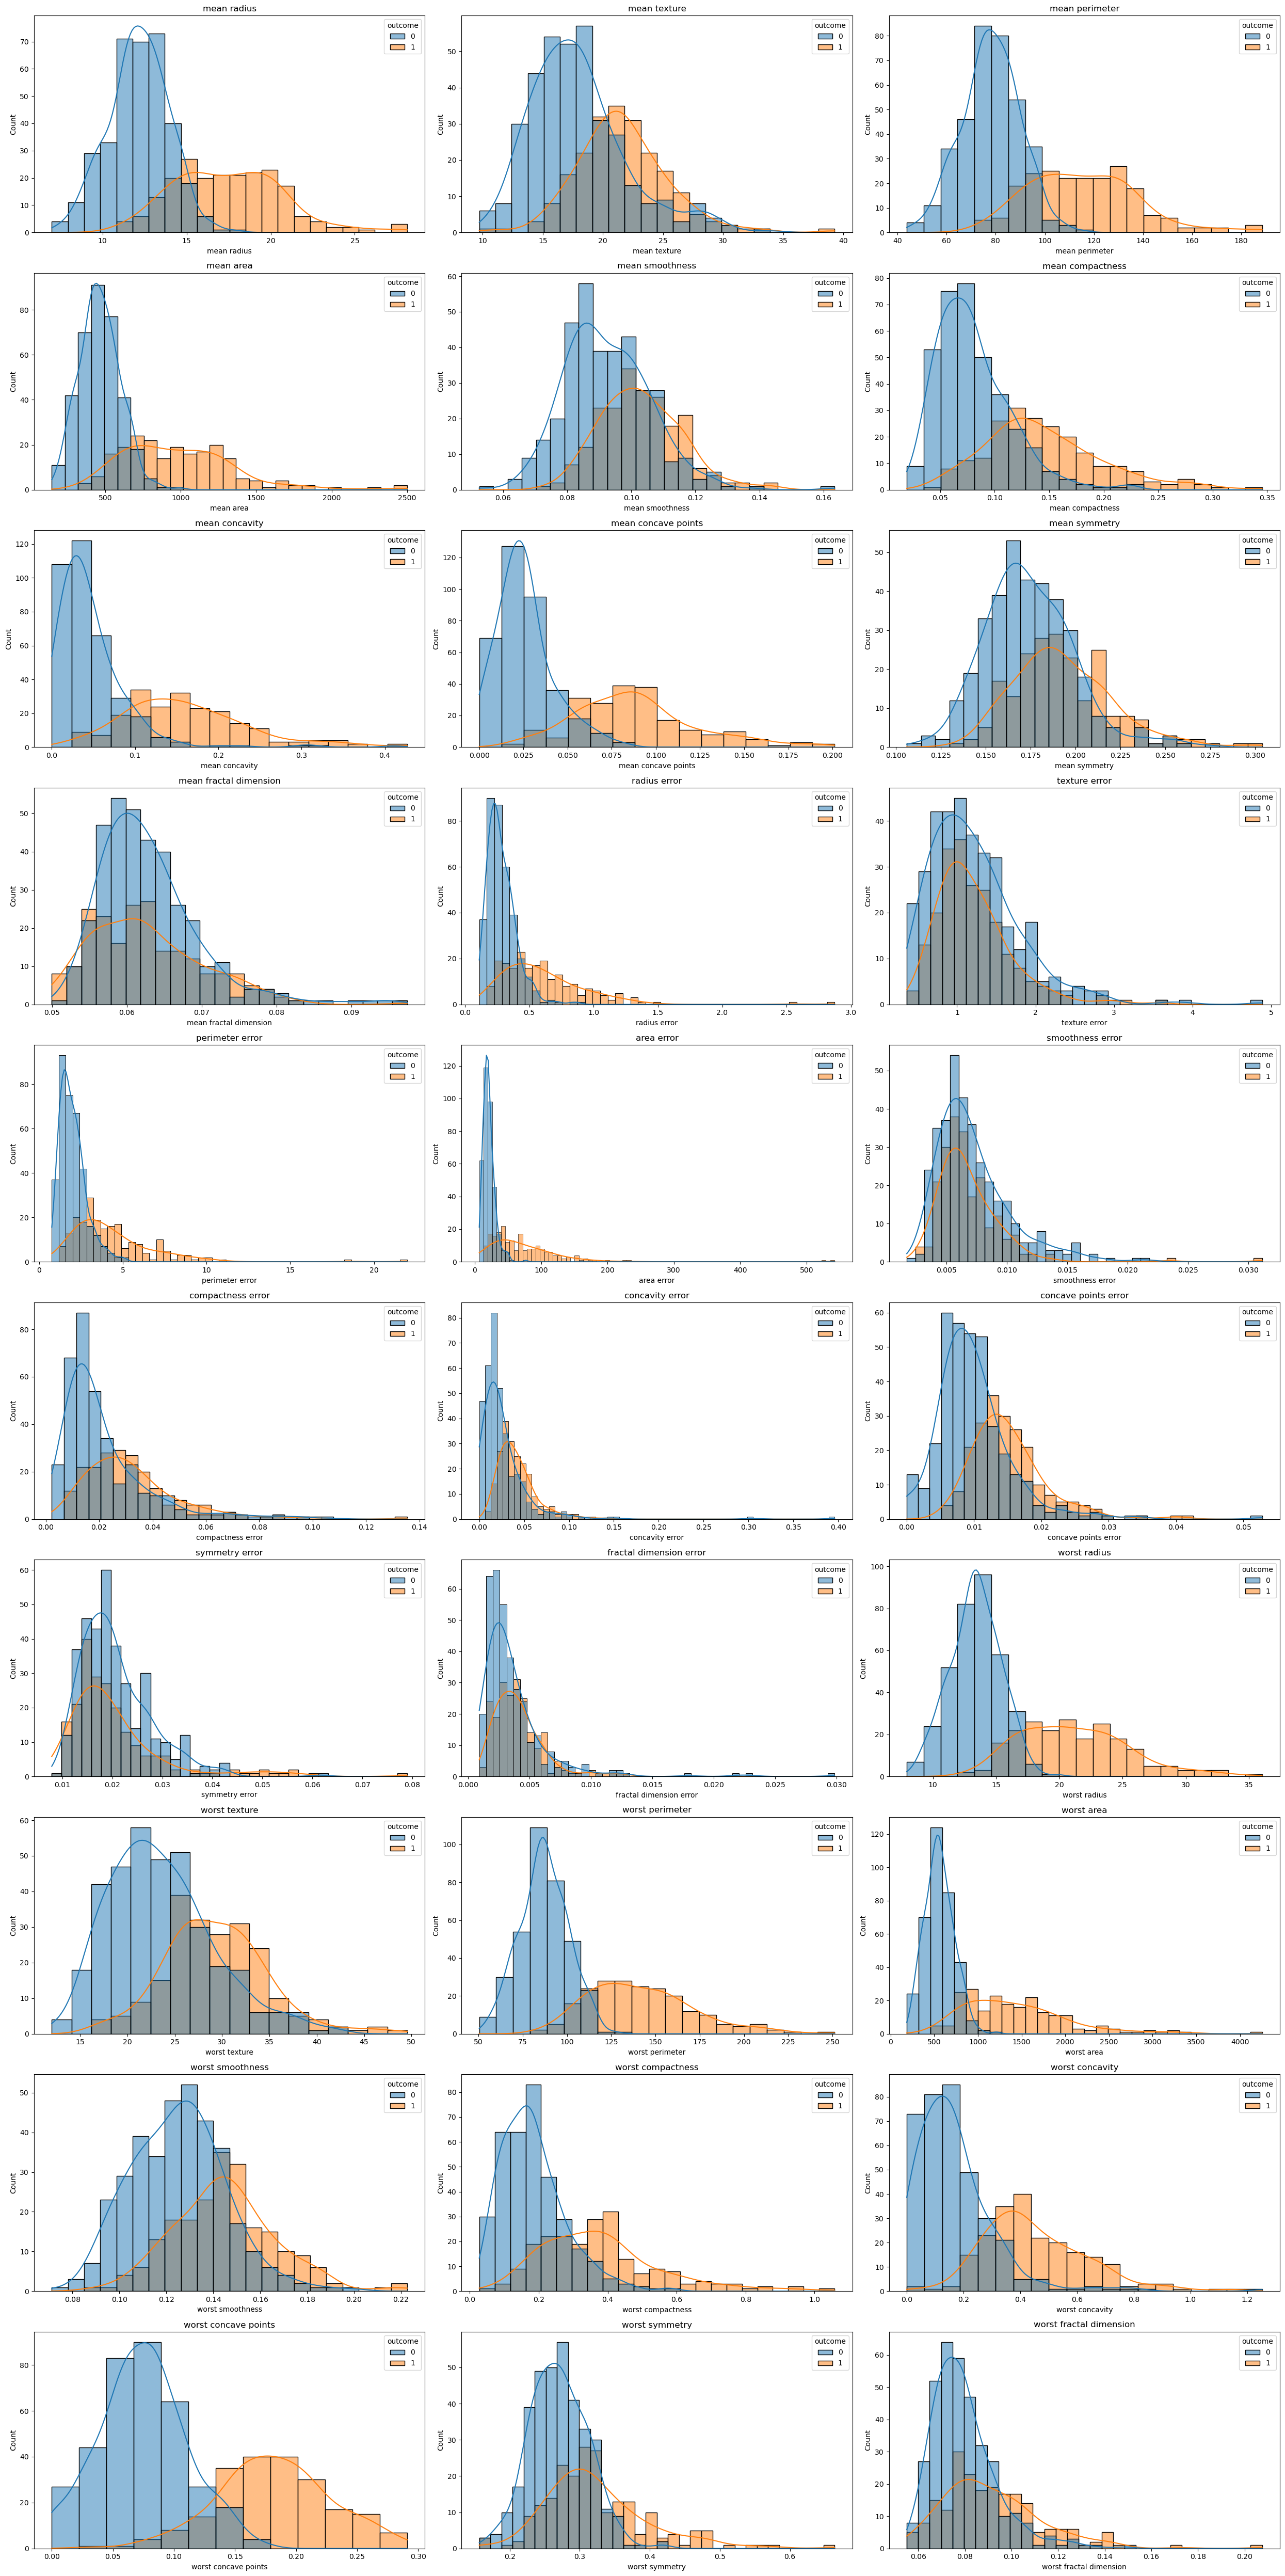

In [11]:
plt.figure(figsize=(25, 50), dpi = 100)
# Create subplots for each independent feature
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(10, 3, i + 1)  
    sns.histplot(data=df, x=column, hue='outcome', kde=True)
    plt.title(column)

# Adjust the spacing between subplots
plt.tight_layout()

### Visualising of Output Result

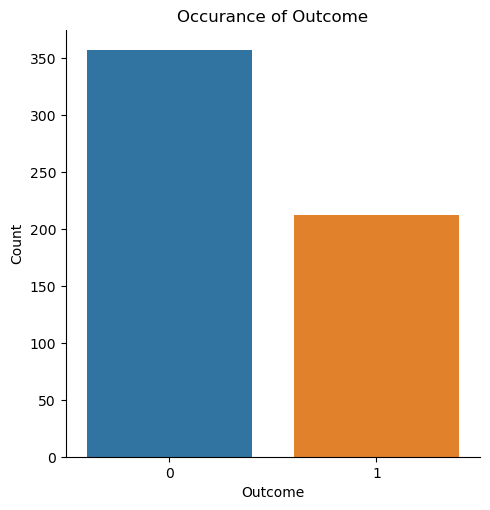

In [12]:
sns.catplot(data = df, x = 'outcome', kind = 'count')
plt.title("Occurance of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

## Defining dependent & independent Variable

In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the DataSet into Training & Test Set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Selection

# 1.Decision Tree Regressor

### Initializing the Model

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)

### Training the Model

In [16]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting the result for test set

In [17]:
y_pred_dtr = dtr.predict(X_test)

In [18]:
np.concatenate((y_pred_dtr.reshape(-1, 1), y_test.reshape(-1, 1)), axis = 1)

array([[1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.

## Model Prediction

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score

### r2_score

In [20]:
dtr_accuracy = r2_score(y_test, y_pred_dtr)

### mean_squared_error

In [21]:
dtr_fit = mean_squared_error(y_test, y_pred_dtr)

# 2.Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

### Initializing the Model

In [23]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

### Training the model

In [24]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting test Set Result

In [25]:
y_pred_dtc = dtc.predict(X_test)

In [26]:
np.concatenate((y_pred_dtc.reshape(-1, 1), y_test.reshape(-1,1)), axis = 1)

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1,

## Model Prediction

### Accuracy Score

In [27]:
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)

### Model Selection

In [28]:
dtc_fit = mean_squared_error(y_test, y_pred_dtc)

# 3.Random Forest Regression

### Importing the class for Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

### Initializing the model

In [30]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 10)

### Training the model

In [31]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Predicting the Test Set Result

In [32]:
y_pred_rfr = np.round(rfr.predict(X_test)).astype(int)

In [33]:
np.concatenate((y_pred_rfr.reshape(-1, 1), y_test.reshape(-1, 1)), axis = 1)

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1,

## Model Prediction

In [34]:
rfr_accuracy = r2_score(y_test, y_pred_rfr)

### mean_squared_error

In [35]:
rfr_fit = mean_squared_error(y_test, y_pred_rfr)

# 4.Random Forest Classification

### Importing the class 

In [36]:
from sklearn.ensemble import RandomForestClassifier

### Initializing the model

In [37]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

### Model Initialization

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting Test Set Result

In [39]:
y_pred_rfc = rfc.predict(X_test)

In [40]:
np.concatenate((y_pred_rfc.reshape(-1,1), y_test.reshape(-1,1)), axis = 1)

array([[1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1,

### Model Prediction

### Accuracy Score

In [41]:
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

### Mean Squared Error

In [42]:
rfc_fit = mean_squared_error(y_test, y_pred_rfc)

# Printing Model Fitting & Accuracy

In [43]:
models_name = ["Decision Tree Regression", "Random Forest Regression", "Decision Tree Classifier", "Random Forest Classifier"]

In [44]:
models_accuracy = [dtr_accuracy,rfr_accuracy,dtc_accuracy, rfc_accuracy]

In [45]:
models_fit = [dtr_fit, rfr_fit, dtc_fit, rfc_fit]

# Accuracy Score / r2 Score & Mean Squared Error In Table

In [46]:
result = pd.DataFrame(data = models_accuracy, index = models_name, columns =["accuracy_score"])

In [47]:
result['Mean Squared Error'] = models_fit
result

,accuracy_score,Mean Squared Error
Decision Tree Regression,0.637980,0.087719
Random Forest Regression,0.855192,0.035088
Decision Tree Classifier,0.929825,0.070175
Random Forest Classifier,0.973684,0.026316


# Classification Report

In [48]:
from sklearn.metrics import classification_report
report_dtr = classification_report(y_test, y_pred_dtr)
report_rfr = classification_report(y_test, y_pred_rfr)
report_dtc = classification_report(y_test, y_pred_dtc)
report_rfc = classification_report(y_test, y_pred_rfc)

In [49]:
class_rep = [report_dtr, report_rfr, report_dtc, report_rfc]

In [50]:
for i in range(len(class_rep)):
    print(f'{models_name[i]} Report: \n', class_rep[i])
    print('**********************************************************************\n')

Decision Tree Regression Report: 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

**********************************************************************

Random Forest Regression Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

**********************************************************************

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.9